In [1]:
import GEMVAE

In [2]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys
import warnings
warnings.filterwarnings("ignore")

In [3]:
gdata = sc.read_h5ad('./data/Landau/spleen_rep_1/Mouse_Spleen/adata_RNA.h5ad')
gdata.var_names_make_unique()
gdata

AnnData object with n_obs × n_vars = 2653 × 32285
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'

In [4]:
pdata = sc.read_h5ad('./data/Landau/spleen_rep_1/Mouse_Spleen/adata_Pro.h5ad')
pdata.var_names_make_unique()
pdata

AnnData object with n_obs × n_vars = 2653 × 21
    obsm: 'spatial'

In [5]:
# gdata.obsm=adata.obsm
# gdata.uns = adata.uns
# pdata.obsm=adata.obsm
# pdata.uns = adata.uns

In [6]:
#Normalization Gene
sc.pp.highly_variable_genes(gdata, flavor="seurat_v3", n_top_genes=2200)
sc.pp.normalize_total(gdata, target_sum=1e4)
sc.pp.log1p(gdata)

#Normalization Protein 
#sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
#sc.pp.normalize_total(pdata, target_sum=1e4)
sc.pp.log1p(pdata)

------Calculating spatial graph...
The graph contains 20534 edges, 2653 cells.
7.7399 neighbors per cell on average.


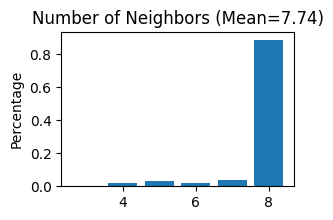

In [7]:
GEMVAE.Cal_Spatial_Net(gdata, rad_cutoff=2)
GEMVAE.Stats_Spatial_Net(gdata)

------Calculating spatial graph...


The graph contains 20534 edges, 2653 cells.
7.7399 neighbors per cell on average.


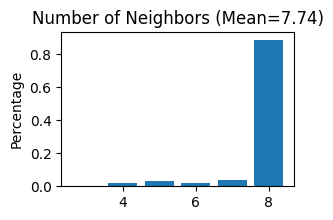

In [8]:
GEMVAE.Cal_Spatial_Net(pdata, rad_cutoff=2)
GEMVAE.Stats_Spatial_Net(pdata)

In [9]:
#parameters 
epochs = 300
hidden_dims_gene = [512,30]
hidden_dims_pro = [128, 30]
contrastive_loss = 10000
alpha = 0.3
pre_resolution_gene = 0.3
pre_resolution_pro = 0.15
save_loss = True

Size of Input for gene data :  (2653, 2200)
Size of Input for protein data :  (2653, 21)
n_layers gene =  2
Hidden dim gene =  [2200, 512, 30]
n_layers protein =  2
Hidden dim protein =  [21, 128, 30]
enc1 =  Tensor("Placeholder_12:0", dtype=float32)
enc1 =  Tensor("Elu:0", shape=(None, None), dtype=float32)
enc2 =  Tensor("Placeholder_13:0", dtype=float32)
enc2 =  Tensor("Elu_1:0", shape=(None, None), dtype=float32)
enc3 =  Tensor("concat:0", shape=(None, 60), dtype=float32)
LATENT =  Tensor("dense_4/BiasAdd:0", shape=(None, 30), dtype=float32)
Instructions for updating:
Colocations handled automatically by placer.
dec1 =  Tensor("add_5:0", shape=(None, 30), dtype=float32)
dec1 =  Tensor("Elu_2:0", shape=(None, 512), dtype=float32)
dec2 =  Tensor("add_5:0", shape=(None, 30), dtype=float32)
dec2 =  Tensor("Elu_3:0", shape=(None, 128), dtype=float32)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
START TRAIN
------Pre-c

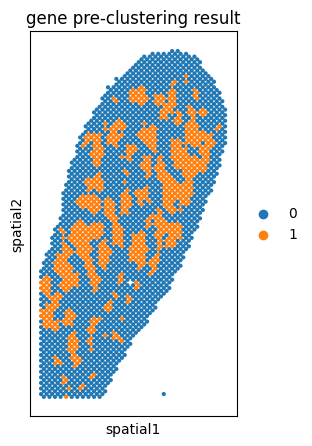

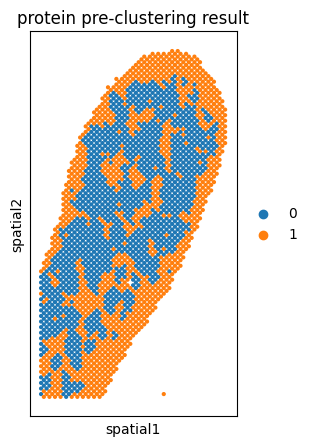

Epoch: 0, Contrastive Loss: 10.0691, Loss: 301593.3125
Epoch: 1, Contrastive Loss: 9.9617, Loss: 164074.7500
Epoch: 2, Contrastive Loss: 9.8129, Loss: 100738.0625
Epoch: 3, Contrastive Loss: 9.6876, Loss: 71785.4062
Epoch: 4, Contrastive Loss: 9.6154, Loss: 56843.2852
Epoch: 5, Contrastive Loss: 9.6022, Loss: 48294.8633
Epoch: 6, Contrastive Loss: 9.6267, Loss: 40359.2344
Epoch: 7, Contrastive Loss: 9.6664, Loss: 31930.4766
Epoch: 8, Contrastive Loss: 9.7073, Loss: 26268.4590
Epoch: 9, Contrastive Loss: 9.7313, Loss: 26176.0684
Epoch: 10, Contrastive Loss: 9.7174, Loss: 26517.0996
Epoch: 11, Contrastive Loss: 9.6722, Loss: 23797.5957
Epoch: 12, Contrastive Loss: 9.6034, Loss: 19767.8770
Epoch: 13, Contrastive Loss: 9.5202, Loss: 16800.8594
Epoch: 14, Contrastive Loss: 9.4388, Loss: 15421.1543
Epoch: 15, Contrastive Loss: 9.3755, Loss: 15490.5068
Epoch: 16, Contrastive Loss: 9.3317, Loss: 15287.5566
Epoch: 17, Contrastive Loss: 9.3019, Loss: 14124.8887
Epoch: 18, Contrastive Loss: 9.279

In [10]:
trained_gdata = GEMVAE.train_GEMVAE(gdata,pdata,n_epochs=epochs,hidden_dims1=hidden_dims_gene,hidden_dims2=hidden_dims_pro,a=contrastive_loss,alpha=alpha,pre_resolution1=pre_resolution_gene,pre_resolution2=pre_resolution_pro, save_loss=save_loss)

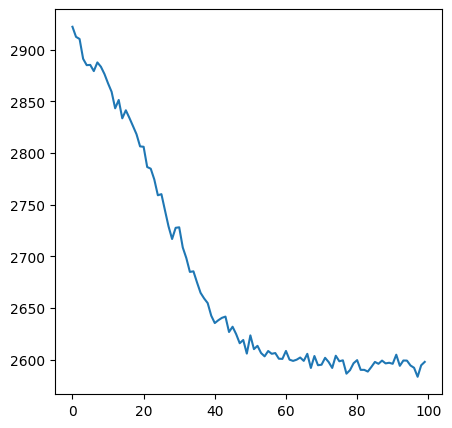

In [ ]:
plt.plot(trained_gdata.uns['arch_loss'])
plt.show()

In [ ]:
os.environ["R_HOME"] = r"C:\Program Files\R\R-4.3.0"
os.environ["PATH"]   = r"C:\Program Files\R\R-4.3.0\bin\x64" + ";" + os.environ["PATH"]

In [ ]:
for tool in ['mclust','leiden','louvain']:
   # we use mcluster as clustering tool by default.
   print("Using tool : ",tool)

   # performing PCA
   gdata.obsm['emb_combined_pca'] = sc.tl.pca(gdata.obsm['MY_ARCH'])

   # clustering
   if tool == 'mclust':
      GEMVAE.clustering(gdata, key='emb_combined_pca', add_key='1', n_clusters=6, method=tool)
   elif tool in ['leiden']:
      GEMVAE.clustering(gdata, key='emb_combined_pca', add_key='2', n_clusters=6, method=tool, start=0.01, end=1.3, increment=0.04)
   elif tool in ['louvain']:
      GEMVAE.clustering(gdata, key='emb_combined_pca', add_key='3', n_clusters=6, method=tool, start=0.01, end=1.3, increment=0.05)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



Using tool :  mclust
fitting ...
  |======================================================================| 100%
Using tool :  leiden
Searching resolution...
resolution=1.29, cluster number=13
resolution=1.25, cluster number=12
resolution=1.21, cluster number=13
resolution=1.17, cluster number=10
resolution=1.1300000000000001, cluster number=10
resolution=1.09, cluster number=9
resolution=1.05, cluster number=8
resolution=1.01, cluster number=7
resolution=0.97, cluster number=6
Using tool :  louvain
Searching resolution...
resolution=1.26, cluster number=8
resolution=1.2100000000000002, cluster number=8
resolution=1.1600000000000001, cluster number=8
resolution=1.11, cluster number=6


Visualizing the clusters

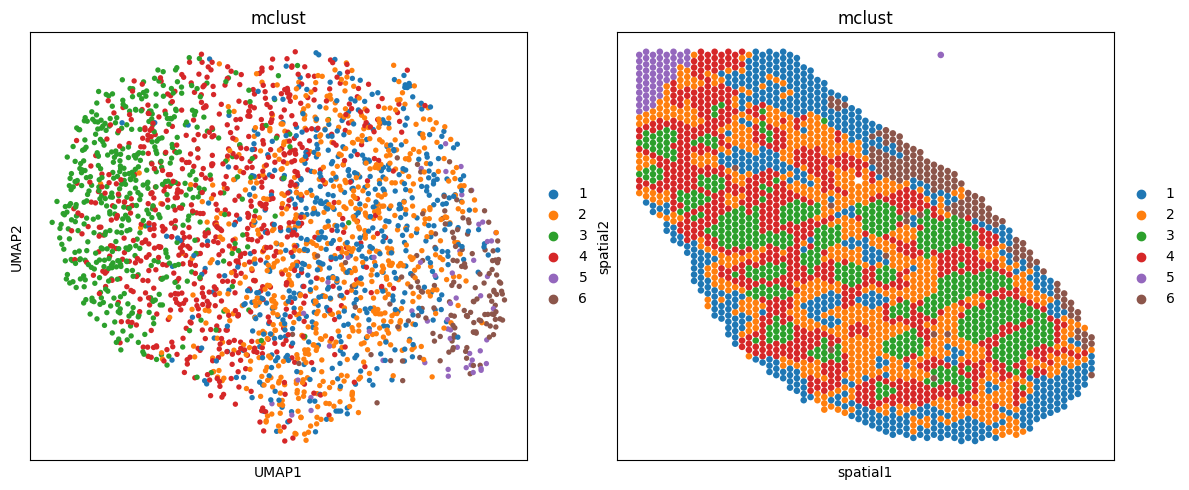

In [ ]:
# visualization Mclust
fig, ax_list = plt.subplots(1, 2, figsize=(12, 5))
sc.pp.neighbors(gdata, use_rep='emb_combined_pca', n_neighbors=10)
sc.tl.umap(gdata)

sc.pl.umap(gdata, color='1', ax=ax_list[0], title='mclust', s=60, show=False)
sc.pl.embedding(gdata, basis='spatial', color='1', ax=ax_list[1], title='mclust', s=90, show=False)

plt.tight_layout(w_pad=0.3)
plt.show()

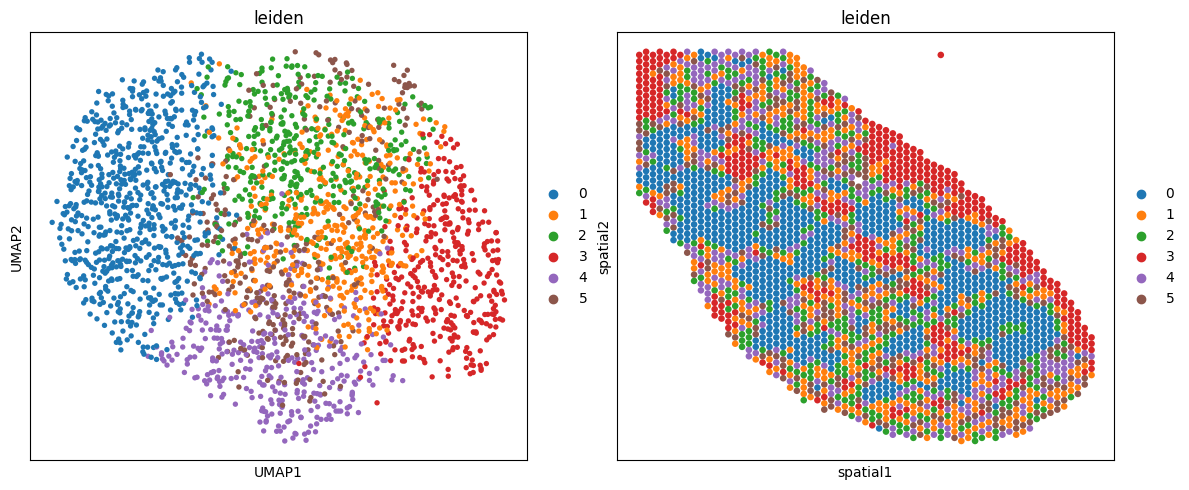

In [ ]:
# visualization leiden
fig, ax_list = plt.subplots(1, 2, figsize=(12, 5))
sc.pp.neighbors(gdata, use_rep='emb_combined_pca', n_neighbors=10)
sc.tl.umap(gdata)

sc.pl.umap(gdata, color='2', ax=ax_list[0], title='leiden', s=60, show=False)
sc.pl.embedding(gdata, basis='spatial', color='2', ax=ax_list[1], title='leiden', s=90, show=False)

plt.tight_layout(w_pad=0.3)
plt.show()

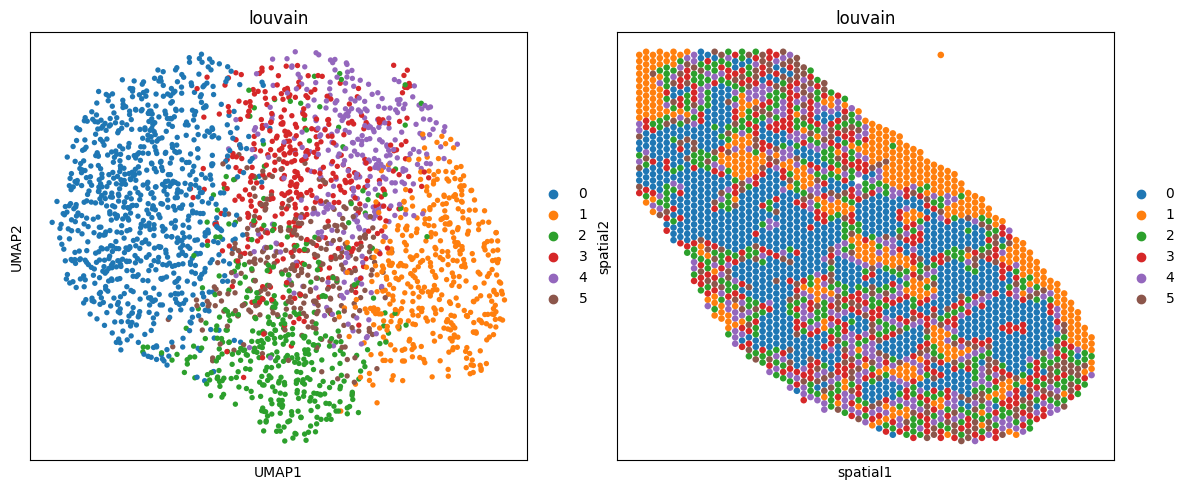

In [ ]:
# visualization louven
fig, ax_list = plt.subplots(1, 2, figsize=(12, 5))
sc.pp.neighbors(gdata, use_rep='emb_combined_pca', n_neighbors=10)
sc.tl.umap(gdata)

sc.pl.umap(gdata, color='3', ax=ax_list[0], title='louvain', s=60, show=False)
sc.pl.embedding(gdata, basis='spatial', color='3', ax=ax_list[1], title='louvain', s=90, show=False)

plt.tight_layout(w_pad=0.3)
plt.show()